# Практическое задание № 1. Классификация


**Работу выполнил:**

Румянцев Алексей Александрович, 368731, ПИИ R22 бак 1.1 

# Распознавание активности человека на основе данных с мобильных сенсоров

Необходимо по данным с мобильных сенсоров при помощи прикладных алгоритмов машинного обучения предсказать активность человека по шести классам движений:
* Движется по прямой
* Движется вверх (например, движение по лестнице вверх)
* Движется вниз (например, движение по лестнице вниз)
* Сидит
* Стоит
* Лежит

## Сведения о наборе данных
Набор данных содержит записи датчиков со сматфонов (акселерометр и гироскоп с частотой дискретизации 50 Гц) от 30 участников, выполняющих следующие действия: ходьба, ходьба по лестнице, ходьба по лестнице, сидение, стояние и лежание. Данные были предварительно обработаны при помощи фильтров шума. Набор данных представлен Хорхе Л. Рейес-Ортисом.

Признаки были извлечены из 3-х осевых необработанных сигналов акселерометра и гироскопа tAcc-XYZ и tGyro-XYZ. Эти сигналы были сняты с постоянной частотой 50 Гц. Затем были отфильтрованны с помощью медианного фильтра и низкочастотного фильтра Баттерворта 3-го порядка с частотой 20 Гц для удаления шумов. Аналогичным образом сигнал ускорения был разделен на сигналы ускорения тела и гравитации (`tBodyAcc-XYZ` и `tGravityAcc-XYZ`) с помощью другого низкочастотного фильтра Баттерворта с угловой частотой 0,3 Гц. Линейное ускорение тела и угловая скорость были использованы для получения сигналов "рывка" — (`tBodyAccJerk-XYZ` и `tBodyGyroJerk-XYZ`). Также величина этих трехмерных сигналов была расчитана с использованием евклидовой нормы — (`tBodyAccMag`, `tGravityAccMag`, `tBodyAccJerkMag`, `tBodyGyroMag`, `tBodyGyroJerkMag`).

Наконец, к некоторым из этих сигналов было применено быстрое преобразование Фурье (БПФ), в результате чего получились `fBodyAcc-XYZ`, `fBodyAccJerk-XYZ`, `fBodyGyro-XYZ`, `fBodyAccJerkMag`, `fBodyGyroMag`, `fBodyGyroJerkMag`. (Обратите внимание на "f" для обозначения сигналов в частотной области).

Набор переменных, которые были оценены по этим сигналам, следующий:
* mean(): Среднее значение
* std(): Стандартное отклонение
* mad(): Среднее абсолютное отклонение
* max(): Наибольшее значение в массиве
* min(): Наименьшее значение в массиве
* sma(): Область величины сигнала
* energy(): Мера энергии. Сумма квадратов, деленная на количество значений.
* iqr(): Интерквартильный размах
* entropy(): Энтропия сигнала
* arCoeff(): Коэффициенты авторегрессии с порядком Burg, равным 4
* correlation(): коэффициент корреляции между двумя сигналами
* maxInds(): индекс частотной составляющей с наибольшей величиной
* meanFreq(): средневзвешенное значение частотных компонент для получения средней частоты
* skewness(): перекос сигнала в частотной области
* kurtosis(): эксцесс сигнала в частотной области
* bandsEnergy(): Энергия частотного интервала в пределах 64 бинов БПФ каждого окна.
* angle(): Угол между векторами.
## Импорт библиотек
Первым делом импортируем необходимые библиотеки для работы с данными:

In [1]:
import os
from pathlib import Path
import pandas as pd

## Считываем набор данных

В прикладных задачах машинного обучения очень важен процесс извлечения признаков (feature extraction), в ходе которого данные интерпретируются в информативные признаки. Также этот процесс может называться проектирование признаков (feature engineering), это весьма трудоемкая и творческая задача. В рамках работы мы опустим эту часть и воспользуемся предобработанными данными.

In [2]:
def read_data(path, filename):
    return pd.read_csv(os.path.join(path, filename))

path = Path().resolve()
train_file = 'train.csv'
df = read_data(path, train_file)
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


Теперь, загрузим полный набор данных и сохраним его под следующими четырьмя переменными:

* `train_X`: признаки, используемые для обучения модели
* `train_y`: метки, используемые для обучения модели
* `test_X`: признаки, используемые для проверки модели
* `test_y`: метки, используемые для проверки модели

In [3]:
def load_dataset(path: str, train_file: str, test_file: str, row: str, label_dict):
    train_X = read_data(path, train_file).values[:, :-2]
    train_y = read_data(path, train_file)[row]
    train_y = train_y.map(label_dict).values
    test_X = read_data(path, test_file).values[:, :-2]
    test_y = read_data(path, test_file)
    test_y = test_y[row].map(label_dict).values
    return (train_X, train_y, test_X, test_y)

test_file = 'test.csv'
row = 'Activity'
label_dict = {'WALKING':0, 'WALKING_UPSTAIRS':1, 'WALKING_DOWNSTAIRS':2, 'SITTING':3, 'STANDING':4, 'LAYING':5}
train_X, train_y, test_X, test_y = load_dataset(path, train_file, test_file, row, label_dict)

## Выбор модели

Импортируем логит-модель из библиотеки `sklearn` и инициализируем её в объект `model`:

In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

Я выбрал логистическую регрессию потому, что она проста в применении и интерпретации, эффективна с вычислительной точки зрения и хорошо работает с большими наборами данных. У данной модели есть следующие гиперпараметры: `max_iter` -- максимальное кол-во итераций для алгоритма оптимизации -- при недостижении сходимости за установленное число итераций точность модели значительно уменьшится; `C` -- сила регуляризации (штраф модели за большие веса признаков) -- нужна для исключения возможности недообучить или переобучить модель; `penalty` -- тип регуляризации, например `l1`, `l2` -- полезна при наличии избыточных признаков; `solver` -- задает алгоритм для оптимизации модели, например `lbfgs`, `liblinear` и `saga` -- выбор повлияет на скорость и точность обучения; `class_weight` -- балансирование классов, `None` или `balanced` -- в первом случае все классы равновесны, во втором модель будет учитывать дисбаланс классов.

## Обучение модели

Обучим модель, используя признаки из обучающего набора (`train_X`) и метки в качестве базовой истины (`train_y`).

In [5]:
model.fit(train_X, train_y)

LogisticRegression(max_iter=1000)

## Оценка модели
Используем обученную модель для прогнозирования активности движения на основе признаков из тестового набора (`test_X`). Прогнозы как список сохраним в переменной `yhat`.

In [6]:
yhat = model.predict(test_X)

Выведем отчет о классификации, который сравнит предсказания (`yhat`) с базовой истиной (`test_y`). `target_names` -- список с именами классов.

In [7]:
from sklearn.metrics import classification_report

target_names = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying']
print(classification_report(test_y, yhat, target_names=target_names))

                    precision    recall  f1-score   support

           Walking       0.94      0.99      0.97       496
  Walking Upstairs       0.97      0.94      0.95       471
Walking Downstairs       0.99      0.96      0.98       420
           Sitting       0.98      0.88      0.92       491
          Standing       0.90      0.98      0.94       532
            Laying       1.00      1.00      1.00       537

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



`recall` (полнота) демонстрирует способность алгоритма обнаруживать данный класс в принципе, а `precision` (точность) -- способность отличать этот класс от других классов. Показатель `f1` -- `fb`-мера при весе точности метрики $\beta=1$ -- среднее гармоническое `precision` и `recall`. Иными словами, она объединяет две метрики в одну, чтобы обеспечить баланс между точностью и полнотой.

## Повтор шагов для других моделей

Теперь выберем модель `k`-ближайших соседей (`knn`) и повторим проделанные ранее шаги:

In [8]:
from sklearn.neighbors import KNeighborsClassifier

model_2 = KNeighborsClassifier(n_neighbors=3)
model_2.fit(train_X, train_y)
yhat_2 = model_2.predict(test_X)
print(classification_report(test_y, yhat_2, target_names=target_names))

                    precision    recall  f1-score   support

           Walking       0.85      0.97      0.91       496
  Walking Upstairs       0.90      0.90      0.90       471
Walking Downstairs       0.93      0.78      0.85       420
           Sitting       0.87      0.78      0.82       491
          Standing       0.82      0.89      0.85       532
            Laying       1.00      1.00      1.00       537

          accuracy                           0.89      2947
         macro avg       0.89      0.89      0.89      2947
      weighted avg       0.89      0.89      0.89      2947



Я выбрал данную модель, так как она является простым алгоритмом обучения на основе экземпляров и может решать многоклассовые задачи классификации. `knn` -- "ленивая" обучаемая модель, ей не требуется этап обучения в традиционном смысле (на этапе `fit` модель просто запоминает все обучающие данные). При этом модель адаптивна -- если добавить новые данные, модель не нужно будет переобучать. `knn` имеет следующие гиперпараметры: `n_neighbors` -- число ближайших соседей, которые будут учитываться при классификации нового объекта -- при маленьком кол-ве соседей модель может переобучиться, а при большом может недообучиться; `weights` -- определяет, как соседние точки будут влиять на итоговый результат (вес), например `uniform` -- все соседние точки имеют одинаковый вес, `distance` -- вклад каждой точки обратно пропорционален расстоянию до нее -- может улучшить точность модели, если заданный параметр подходит для данных; `metric` -- метрика расстояния, например `minkowski`, `euclidean` и `manhattan` -- может повысить точность модели, если выбранный параметр подходит под данные. Для `minkowski` задается степень расстояния Минковского `p` -- при `p=1` манхэттенское расстояние, при `p=2` евклидово -- определяет, как быстро "затухает" влияние более отдаленных точек.

Проделаем те же шаги для модели случайного леса (`random forest`):

In [9]:
from sklearn.ensemble import RandomForestClassifier

model_3 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model_3.fit(train_X, train_y)
yhat_3 = model_3.predict(test_X)
print(classification_report(test_y, yhat_3, target_names=target_names))

                    precision    recall  f1-score   support

           Walking       0.81      0.98      0.89       496
  Walking Upstairs       0.90      0.89      0.89       471
Walking Downstairs       0.95      0.73      0.83       420
           Sitting       0.93      0.76      0.84       491
          Standing       0.81      0.95      0.88       532
            Laying       1.00      1.00      1.00       537

          accuracy                           0.89      2947
         macro avg       0.90      0.88      0.89      2947
      weighted avg       0.90      0.89      0.89      2947



Я выбрал случайный лес потому, что данная модель обладает высокой точностью, так как усреднение прогнозов нескольких деревьев решений уменьшает дисперсию. Также, модель устойчива к шумам и может дать представление о важности признаков. Она обладает следующими гиперпараметрами: `n_estimators` -- количество деревьев в случайном лесе -- большое кол-во деревьев позволит модели лучше обобщать данные, так как с каждым новым деревом ошибка уменьшается; `max_depth` -- ограничивает максимальную глубину каждого дерева (т. е. ограничивает количество раз разделения данных) -- большое значение может привести к переобучению, а маленькое к недообучению; `min_samples_split` -- минимальное кол-во примеров в узле, чтобы выполнить его разделение -- увеличение этого параметра приведет к более "сжатым" деревьям, что поможет избежать переобучения; `min_samples_leaf` -- минимальное кол-во примеров в каждом листе дерева (если меньше, то дерево остановится) -- параметр позволяет предотвратить переобучение, так как уменьшает вероятность того, что дерево будет слишком специфично для маленьких участков данных; `max_features` -- задает максимальное кол-во признаков, которые будут использоваться при каждом разделении дерева -- меньшее кол-во признаков делает деревья более разнообразными и помогают снизить переобучение, однако точность может ухудшиться.

## Наглядное сравнение

Для начала, для сравнения результатов работы моделей, создадим метод, который принимает истину и предсказания, считает точность и выводит в консоль с указанными именованиями (нужен для удобного сравнения сразу трех моделей):

In [10]:
from sklearn.metrics import accuracy_score

def print_acc3(test, res1, res2, res3, name1, name2, name3):
    print(f'accuracy:\n{name1}: {accuracy_score(test, res1):.2f}\
            \n{name2}: {accuracy_score(test, res2):.2f}\
            \n{name3}: {accuracy_score(test, res3):.2f}\n')

Визуализировать результаты предсказаний моделей с истиной будем с помощью матрицы ошибок, где по горизонтали предсказания, а по вертикали истина. Напишем метод, который будет принимать соответствующие каждой модели матрицы ошибок, именования классов и названия самих моделей для подписи рисунков. Метод может сравнить 2 или 3 матрицы ошибок. С помощью `matplotlib` и `seaborn` отрисуем каждую матрицу ошибок на одном плоте и выведем на экран. Зададим параметры для настройки отображения чисел, цвета и подписей (одинаковые по `OX` и `OY`):

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

def perform(cm1, cm2, cm3, tn, name1, name2, name3):
    if cm3 is None:
        fig, axes = plt.subplots(1, 2, figsize=(20, 4))
    else:
        fig, axes = plt.subplots(1, 3, figsize=(20, 4))

    sns.heatmap(cm1, annot=True, fmt="d", cmap='viridis', xticklabels=tn, yticklabels=tn, ax=axes[0])
    axes[0].set_title(f'{name1} Confusion Matrix')
    axes[0].set_xlabel('Predicted labels')
    axes[0].set_ylabel('True labels')

    sns.heatmap(cm2, annot=True, fmt="d", cmap='viridis', xticklabels=tn, yticklabels=tn, ax=axes[1])
    axes[1].set_title(f'{name2} Confusion Matrix')
    axes[1].set_xlabel('Predicted labels')
    axes[1].set_ylabel('True labels')

    if cm3 is not None:
        sns.heatmap(cm3, annot=True, fmt="d", cmap='viridis', xticklabels=tn, yticklabels=tn, ax=axes[2])
        axes[2].set_title(f'{name3} Confusion Matrix')
        axes[2].set_xlabel('Predicted labels')
        axes[2].set_ylabel('True labels')

    plt.tight_layout()
    plt.show()

Теперь посчитаем матрицы ошибок для каждых предсказаний моделей, зададим именования для графиков и подсчета точности, и вызовем соответствующие методы, куда передадим найденные и заданные переменные и получим результат:

accuracy:
Logistic Regression: 0.96            
KNeighbors: 0.89            
Random Forest: 0.89



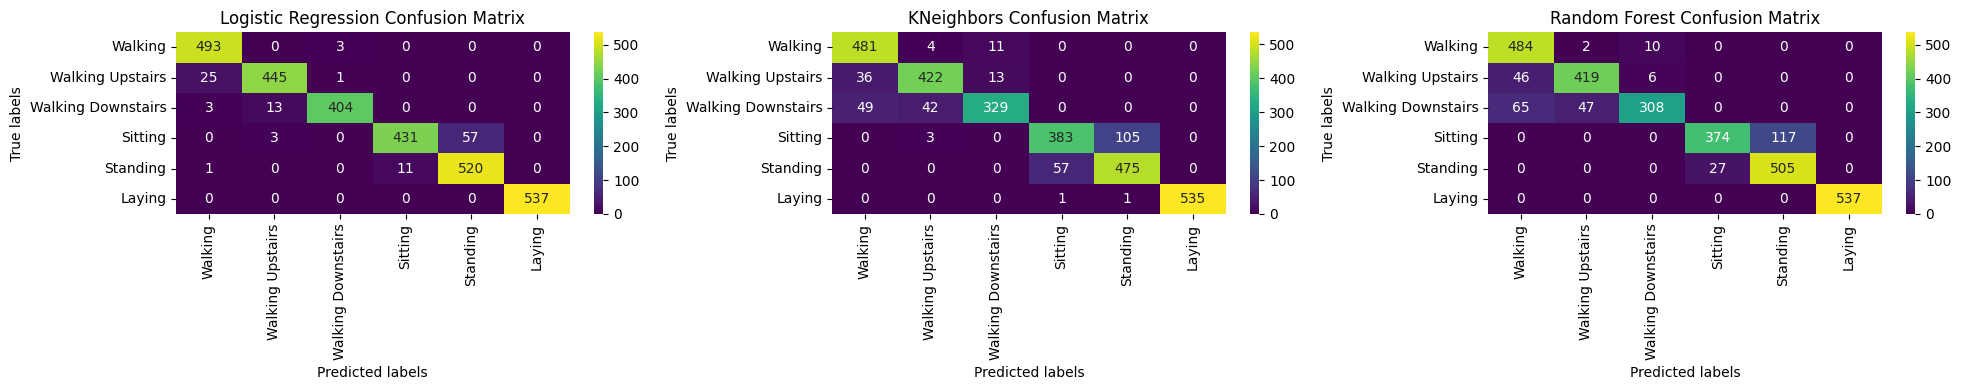

In [51]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_y, yhat)
conf_matrix_2 = confusion_matrix(test_y, yhat_2)
conf_matrix_3 = confusion_matrix(test_y, yhat_3)

name_1, name_2, name_3 =  "Logistic Regression", "KNeighbors", "Random Forest"
print_acc3(test_y, yhat, yhat_2, yhat_3, name_1, name_2, name_3)
perform(conf_matrix, conf_matrix_2, conf_matrix_3,
        target_names, name_1, name_2, name_3)

Как видим, самой точной получилась логит-модель. Однако нельзя утверждать, что для наших данных эта модель является самой точной в принципе, так как мы не настраивали гиперпараметры моделей, а задали некоторые по умолчанию. По матрице ошибок на главной диагонали видим `true positive`, а за ее пределами `false positive` (значения в столбце) и `false negative` (значения в строке).

## Настройка гиперпараметров

Используем вариации нескольких моделей с разными гиперпараметрами. Сравним (визуализируем) полученный результат. Гиперпараметры модели машинного обучения -- это настраиваемые параметры, с помощью которых мы можем управлять процессом обучения.

Теперь будем сравнивать модели не только по точности их предсказаний и матрицам ошибок, но и по времени вычисления предсказаний. Для начала напишем метод для удобного вывода в консоль времени выполнения. Смысл реализации аналогичен методу с подсчетом точности:

In [20]:
import time

def print_time3(time1, time2, time3, name1, name2, name3):
    print(f'time (sec):\n{name1}: {time1:.2f}\
            \n{name2}: {time2:.2f}\
            \n{name3}: {time3:.2f}\n')

## Логистическая регрессия

Исследуем влияние гиперпараметра `max_iter` в логит-модели. Ранее мы расписывали, за что отвечает каждый параметр данной модели и на что влияет.

Перед каждым предсказанием записываем время выполнения программы на момент этой строки, после подсчета предсказаний находим разницу между нынешним временем и начальным. Подготовка и вывод результатов аналогичны предыдущим примерам:

accuracy:
Logistic Regression max_iter=2000: 0.96            
Logistic Regression max_iter=1000: 0.96            
Logistic Regression max_iter=250: 0.96

time (sec):
Logistic Regression max_iter=2000: 2.15            
Logistic Regression max_iter=1000: 2.06            
Logistic Regression max_iter=250: 2.04



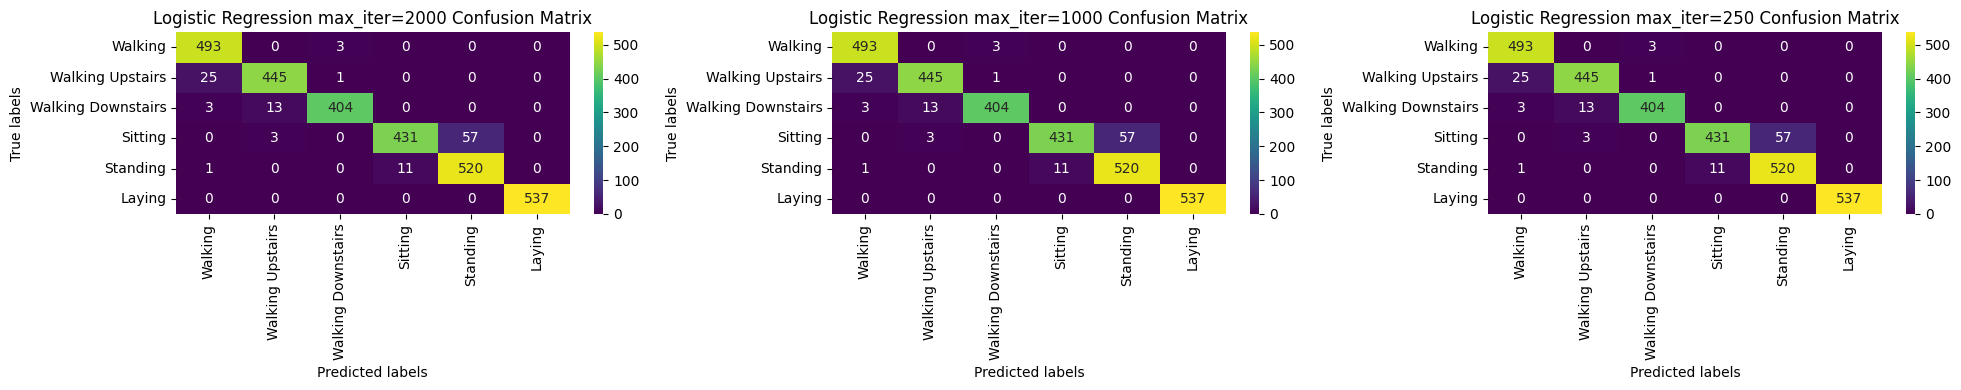

In [30]:
start_time = time.time()
new_yhat_1 = LogisticRegression(max_iter=2000).fit(train_X, train_y).predict(test_X)
time_1 = time.time() - start_time

start_time = time.time()
new_yhat_2 = LogisticRegression(max_iter=1000).fit(train_X, train_y).predict(test_X)
time_2 = time.time() - start_time

start_time = time.time()
new_yhat_3 = LogisticRegression(max_iter=250).fit(train_X, train_y).predict(test_X)
time_3 = time.time() - start_time

new_conf_matrix_1 = confusion_matrix(test_y, new_yhat_1)
new_conf_matrix_2 = confusion_matrix(test_y, new_yhat_2)
new_conf_matrix_3 = confusion_matrix(test_y, new_yhat_3)

name_1, name_2, name_3 = "Logistic Regression max_iter=2000", "Logistic Regression max_iter=1000", "Logistic Regression max_iter=250"
print_acc3(test_y, new_yhat_1, new_yhat_2, new_yhat_3, name_1, name_2, name_3)
print_time3(time_1, time_2, time_3, name_1, name_2, name_3)
perform(new_conf_matrix_1, new_conf_matrix_2, new_conf_matrix_3,
        target_names, name_1, name_2, name_3)

Как видим, если кол-ва итераций достаточно для обеспечения сходимости (в данном случае 250 хватает), то точность будет такой же высокой, как если бы мы задали большее кол-во итераций, но время предсказывания уменьшится. Если кол-ва итераций не хватит, то точность упадет, а по времени выполнения мы не сильно выиграем.

Исследуем влияние гиперпараметра `C` на логит-модель (все действия для получения результата аналогичны):

accuracy:
Logistic Regression C=0.0001: 0.82            
Logistic Regression C=0.01: 0.94            
Logistic Regression C=1000: 0.96

time (sec):
Logistic Regression C=0.0001: 1.04            
Logistic Regression C=0.01: 2.56            
Logistic Regression C=1000: 3.59



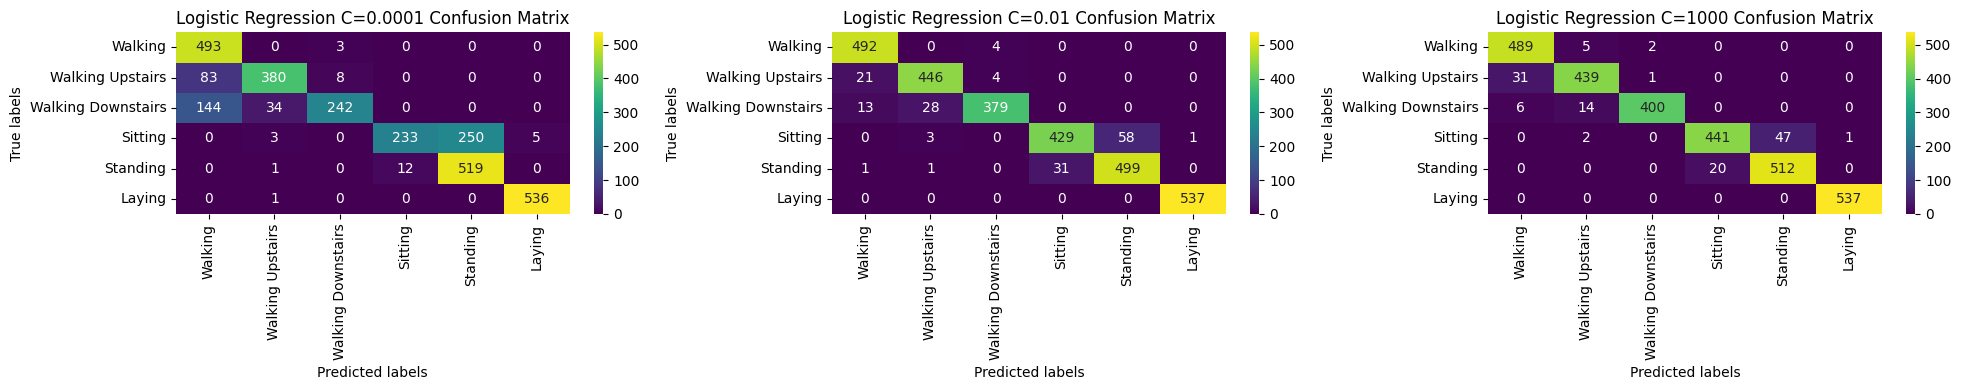

In [23]:
start_time = time.time()
new_yhat_1 = LogisticRegression(max_iter=1000, C=0.0001).fit(train_X, train_y).predict(test_X)
time_1 = time.time() - start_time

start_time = time.time()
new_yhat_2 = LogisticRegression(max_iter=1000, C=0.01).fit(train_X, train_y).predict(test_X)
time_2 = time.time() - start_time

start_time = time.time()
new_yhat_3 = LogisticRegression(max_iter=1000, C=1000).fit(train_X, train_y).predict(test_X)
time_3 = time.time() - start_time

new_conf_matrix_1 = confusion_matrix(test_y, new_yhat_1)
new_conf_matrix_2 = confusion_matrix(test_y, new_yhat_2)
new_conf_matrix_3 = confusion_matrix(test_y, new_yhat_3)

name_1, name_2, name_3 = "Logistic Regression C=0.0001", "Logistic Regression C=0.01", "Logistic Regression C=1000"
print_acc3(test_y, new_yhat_1, new_yhat_2, new_yhat_3, name_1, name_2, name_3)
print_time3(time_1, time_2, time_3, name_1, name_2, name_3)
perform(new_conf_matrix_1, new_conf_matrix_2, new_conf_matrix_3,
        target_names, name_1, name_2, name_3)

Выходит, что при маленьком значении параметра `C` (маленьком штрафе) точность предсказаний уменьшается, хотя время выполнения меньше. При оптимальном значении точность и время выполнения хорошие, а при большом `C` за маленькую прибавку к точности платим более длительным временем выполнения. При этом, хоть точность и увеличилась, появились некоторые ошибки `false positive` и `false negative`, которых при меньшем значении не было.

Исследуем влияние параметра `solver`. Зададим `lbfgs` (метод квазиньютоновской оптимизации), `liblinear` (метод линейной оптимизации) и `saga` (вариант стохастического градиентного спуска, модифицированный для работы с регуляризацией):

accuracy:
Logistic Regression lbfgs: 0.96            
Logistic Regression liblinear: 0.96            
Logistic Regression saga: 0.96

time (sec):
Logistic Regression lbfgs: 2.20            
Logistic Regression liblinear: 5.25            
Logistic Regression saga: 87.35



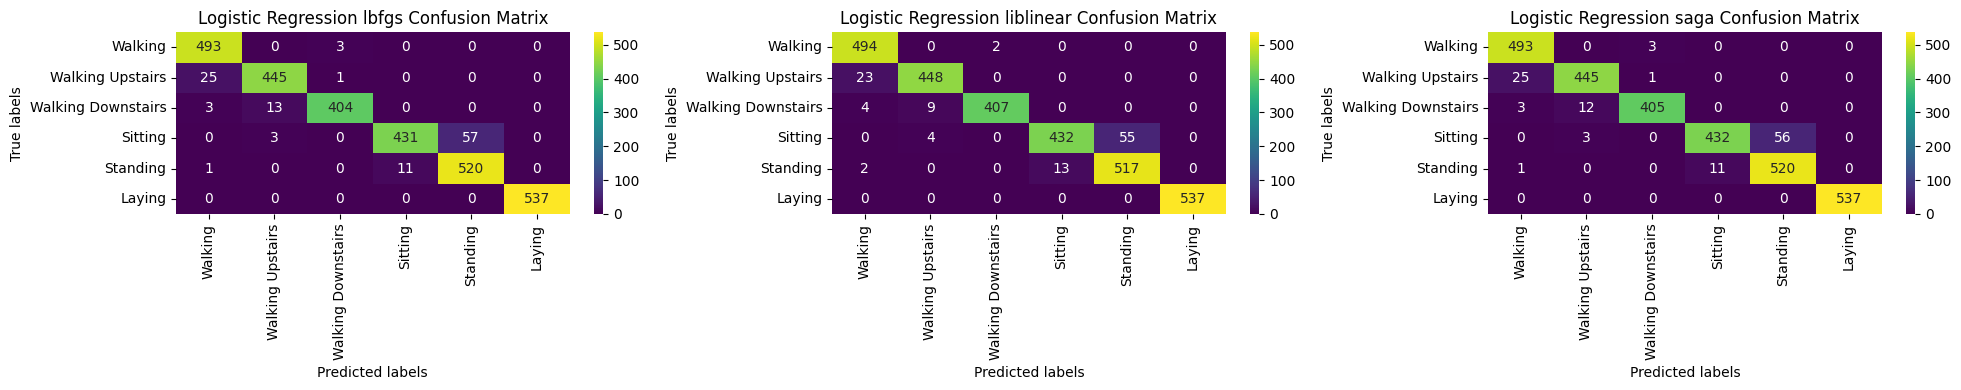

In [22]:
start_time = time.time()
new_yhat_1 = LogisticRegression(max_iter=1000, solver='lbfgs').fit(train_X, train_y).predict(test_X)
time_1 = time.time() - start_time

start_time = time.time()
new_yhat_2 = LogisticRegression(max_iter=1000, solver='liblinear').fit(train_X, train_y).predict(test_X)
time_2 = time.time() - start_time

start_time = time.time()
new_yhat_3 = LogisticRegression(max_iter=1000, solver='saga').fit(train_X, train_y).predict(test_X)
time_3 = time.time() - start_time

new_conf_matrix_1 = confusion_matrix(test_y, new_yhat_1)
new_conf_matrix_2 = confusion_matrix(test_y, new_yhat_2)
new_conf_matrix_3 = confusion_matrix(test_y, new_yhat_3)

name_1, name_2, name_3 = "Logistic Regression lbfgs", "Logistic Regression liblinear", "Logistic Regression saga"
print_acc3(test_y, new_yhat_1, new_yhat_2, new_yhat_3, name_1, name_2, name_3)
print_time3(time_1, time_2, time_3, name_1, name_2, name_3)
perform(new_conf_matrix_1, new_conf_matrix_2, new_conf_matrix_3,
        target_names, name_1, name_2, name_3)

Как видим, точность вышла одинаковой, однако время выполнения для `saga` значительно больше времени выполнения для двух других значений гиперпараметра. В данном случае `lbfgs` является оптимальным вариантом, хотя для других случаев на главной диагонали преимущественно видим более частые верные предсказания.

## `k`-ближайших соседей

Теперь исследуем гиперпараметр количества соседей для `knn` модели:

accuracy:
KNeighbors n=2: 0.86            
KNeighbors n=5: 0.90            
KNeighbors n=10: 0.91

time (sec):
KNeighbors n=2: 0.82            
KNeighbors n=5: 0.71            
KNeighbors n=10: 0.66



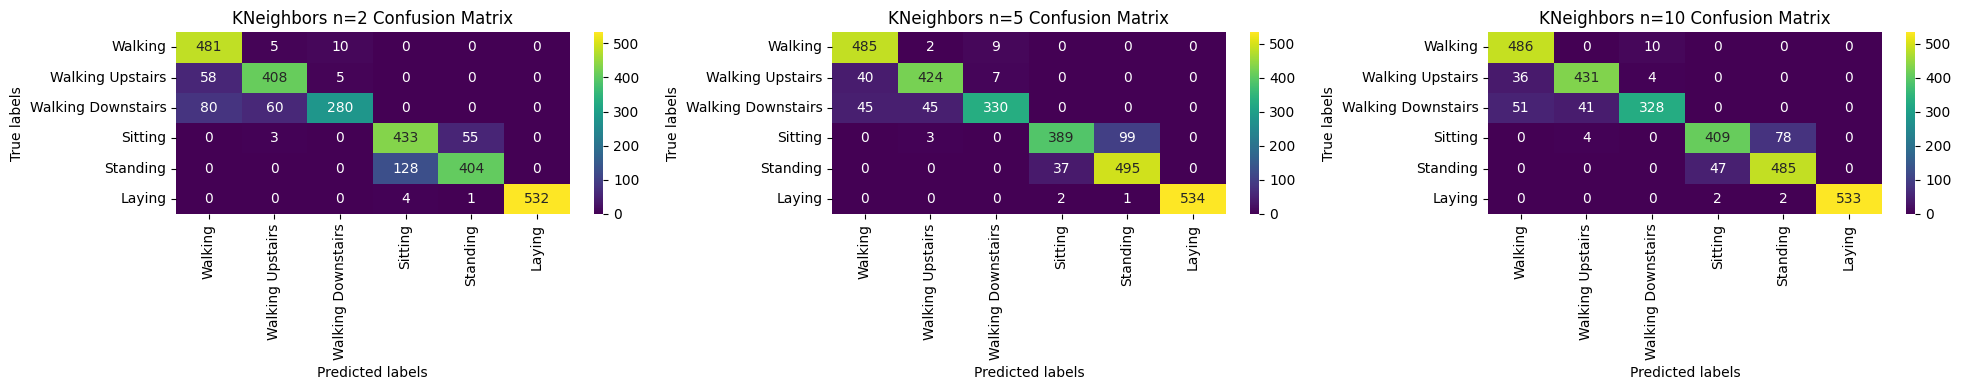

In [33]:
start_time = time.time()
new_yhat_1 = KNeighborsClassifier(n_neighbors=2).fit(train_X, train_y).predict(test_X)
time_1 = time.time() - start_time

start_time = time.time()
new_yhat_2 = KNeighborsClassifier(n_neighbors=5).fit(train_X, train_y).predict(test_X)
time_2 = time.time() - start_time

start_time = time.time()
new_yhat_3 = KNeighborsClassifier(n_neighbors=10).fit(train_X, train_y).predict(test_X)
time_3 = time.time() - start_time

new_conf_matrix_1 = confusion_matrix(test_y, new_yhat_1)
new_conf_matrix_2 = confusion_matrix(test_y, new_yhat_2)
new_conf_matrix_3 = confusion_matrix(test_y, new_yhat_3)

name_1, name_2, name_3 = "KNeighbors n=2", "KNeighbors n=5", "KNeighbors n=10"
print_acc3(test_y, new_yhat_1, new_yhat_2, new_yhat_3, name_1, name_2, name_3)
print_time3(time_1, time_2, time_3, name_1, name_2, name_3)
perform(new_conf_matrix_1, new_conf_matrix_2, new_conf_matrix_3,
        target_names, name_1, name_2, name_3)

Видим, что при увеличении кол-ва соседей точность увеличивается, а время выполнения уменьшается. Это происходит потому, что с ростом `n` модель переходит от точного соответствия ближайшему соседу к усреднению по большему кол-ву точек. Это снижает кол-во сравнений для принятия решения, следовательно время предсказания уменьшается. Точность повышается, так как модель становится менее подверженной к небольшим колебаниям в данных с увеличением `n`. В данном случае `n=5` -- оптимальное значение.

Исследуем параметр `metric` -- зададим `minkowski` для `p=2` (он должен по результатам быть равен `euclidean`. если поменять на `p=1`, то `manhattan`), `euclidean` и `manhattan`:

accuracy:
KNeighbors minkowski p=2: 0.89            
KNeighbors euclidean: 0.89            
KNeighbors manhattan: 0.91

time (sec):
KNeighbors minkowski p=2: 0.89            
KNeighbors euclidean: 0.74            
KNeighbors manhattan: 2.40



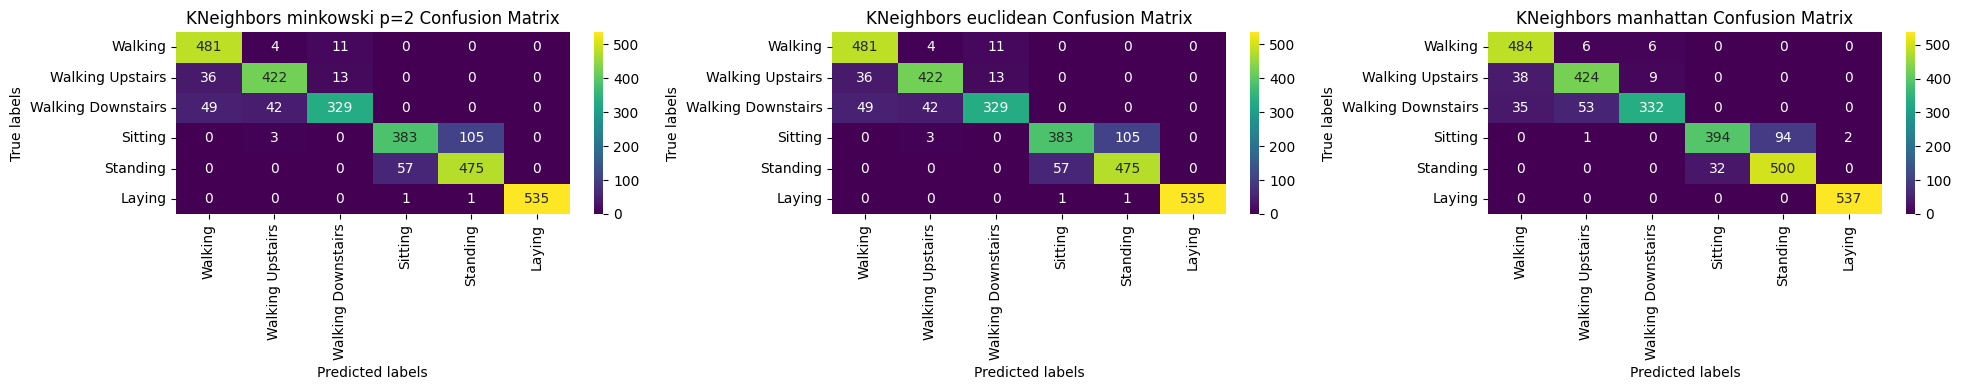

In [37]:
start_time = time.time()
# if p=1->manhattan, if p=2->euclidean
par_p = 2
new_yhat_1 = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=par_p).fit(train_X, train_y).predict(test_X)
time_1 = time.time() - start_time

start_time = time.time()
new_yhat_2 = KNeighborsClassifier(n_neighbors=3, metric='euclidean').fit(train_X, train_y).predict(test_X)
time_2 = time.time() - start_time

start_time = time.time()
new_yhat_3 = KNeighborsClassifier(n_neighbors=3, metric='manhattan').fit(train_X, train_y).predict(test_X)
time_3 = time.time() - start_time

new_conf_matrix_1 = confusion_matrix(test_y, new_yhat_1)
new_conf_matrix_2 = confusion_matrix(test_y, new_yhat_2)
new_conf_matrix_3 = confusion_matrix(test_y, new_yhat_3)

name_1, name_2, name_3 = f"KNeighbors minkowski p={par_p}", "KNeighbors euclidean", "KNeighbors manhattan"
print_acc3(test_y, new_yhat_1, new_yhat_2, new_yhat_3, name_1, name_2, name_3)
print_time3(time_1, time_2, time_3, name_1, name_2, name_3)
perform(new_conf_matrix_1, new_conf_matrix_2, new_conf_matrix_3,
        target_names, name_1, name_2, name_3)

Метрика минковского для `p=2` совпала с евклидовой. Точность с манхэттэновской метрикой выше, чем с евклидовой, однако время вычисления предсказаний значительно выше. Оптимальным вариантом в данном случае будет евклидова метрика.

Исследуем гиперпараметр `weights` -- зададим `uniform` и `distance`. В данном случае выведем только два результата:

accuracy:
KNeighbors uniform: 0.89            
KNeighbors distance: 0.91

time (sec):
KNeighbors uniform: 0.81            
KNeighbors distance: 0.58



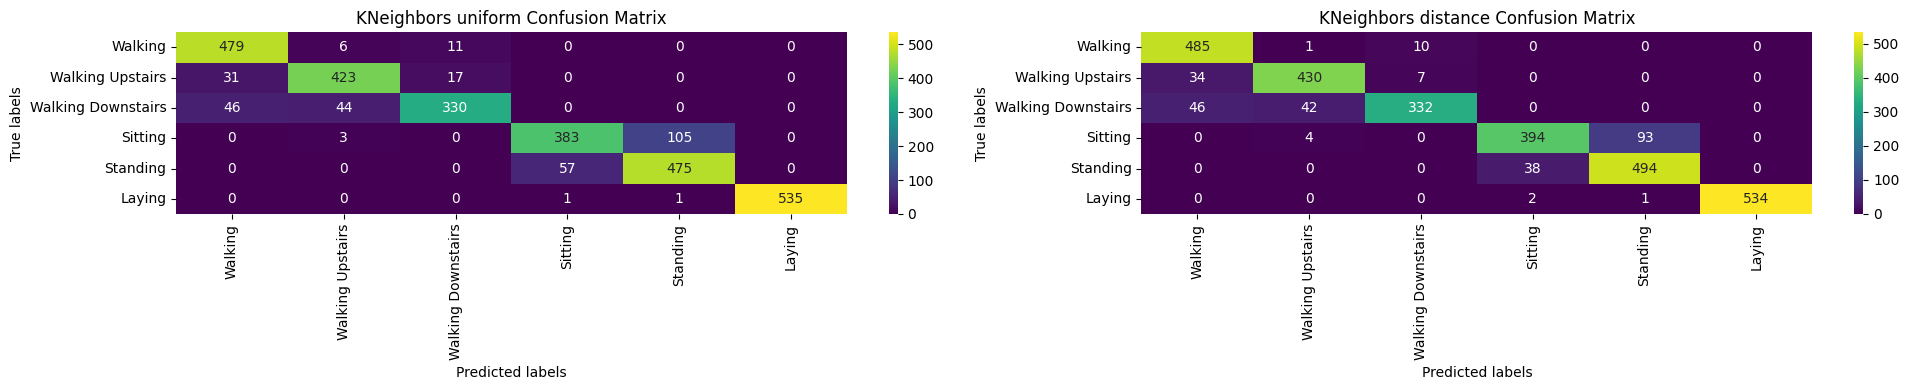

In [46]:
start_time = time.time()
new_yhat_1 = KNeighborsClassifier(n_neighbors=3, weights='uniform').fit(train_X, train_y).predict(test_X)
time_1 = time.time() - start_time

start_time = time.time()
new_yhat_2 = KNeighborsClassifier(n_neighbors=3, weights='distance').fit(train_X, train_y).predict(test_X)
time_2 = time.time() - start_time

new_conf_matrix_1 = confusion_matrix(test_y, new_yhat_2)
new_conf_matrix_2 = confusion_matrix(test_y, new_yhat_3)

name_1, name_2 = "KNeighbors uniform", "KNeighbors distance"
print(f'accuracy:\n{name_1}: {accuracy_score(test_y, new_yhat_2):.2f}\
            \n{name_2}: {accuracy_score(test_y, new_yhat_3):.2f}\n')
print(f'time (sec):\n{name_1}: {time_1:.2f}\
            \n{name_2}: {time_2:.2f}\n')
perform(new_conf_matrix_1, new_conf_matrix_2, None,
        target_names, name_1, name_2, None)

Как видим, для наших данных весы `distance` оказались и точнее, и быстрее. Значения на главной диагонали преимущественно больше.

## Случайный лес

Исследуем параметр `n_estimators`:

accuracy:
Random Forest n_estimators=50: 0.89            
Random Forest n_estimators=100: 0.89            
Random Forest n_estimators=200: 0.89

time (sec):
Random Forest n_estimators=50: 4.40            
Random Forest n_estimators=100: 8.49            
Random Forest n_estimators=200: 16.52



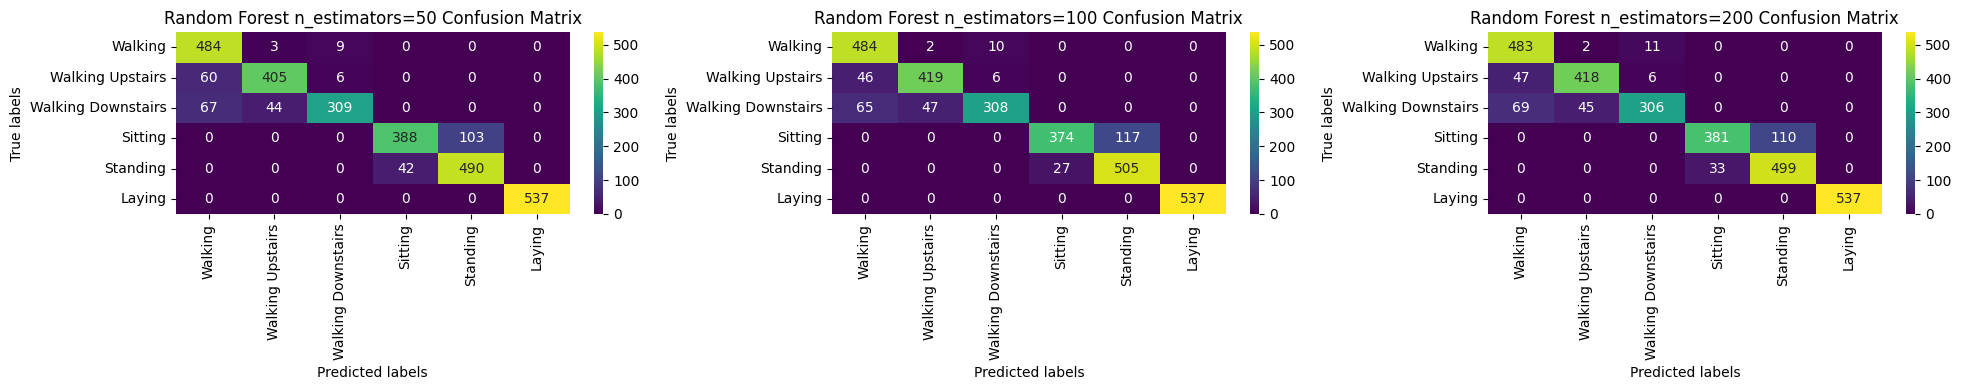

In [48]:
start_time = time.time()
new_yhat_1 = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42).fit(train_X, train_y).predict(test_X)
time_1 = time.time() - start_time

start_time = time.time()
new_yhat_2 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42).fit(train_X, train_y).predict(test_X)
time_2 = time.time() - start_time

start_time = time.time()
new_yhat_3 = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42).fit(train_X, train_y).predict(test_X)
time_3 = time.time() - start_time

new_conf_matrix_1 = confusion_matrix(test_y, new_yhat_1)
new_conf_matrix_2 = confusion_matrix(test_y, new_yhat_2)
new_conf_matrix_3 = confusion_matrix(test_y, new_yhat_3)

name_1, name_2, name_3 = "Random Forest n_estimators=50", "Random Forest n_estimators=100", "Random Forest n_estimators=200"
print_acc3(test_y, new_yhat_1, new_yhat_2, new_yhat_3, name_1, name_2, name_3)
print_time3(time_1, time_2, time_3, name_1, name_2, name_3)
perform(new_conf_matrix_1, new_conf_matrix_2, new_conf_matrix_3,
        target_names, name_1, name_2, name_3)

Видим, что 50 деревьев достаточно для наших данных. При увеличении кол-ва деревьев точность не изменяется, а вермя выполнения значительно увеличивается.

Исследуем влияние гиперпараметра `max_depth`:

accuracy:
Random Forest max_depth=5: 0.89            
Random Forest max_depth=13: 0.92            
Random Forest max_depth=20: 0.93

time (sec):
Random Forest max_depth=5: 8.33            
Random Forest max_depth=13: 15.87            
Random Forest max_depth=20: 17.25



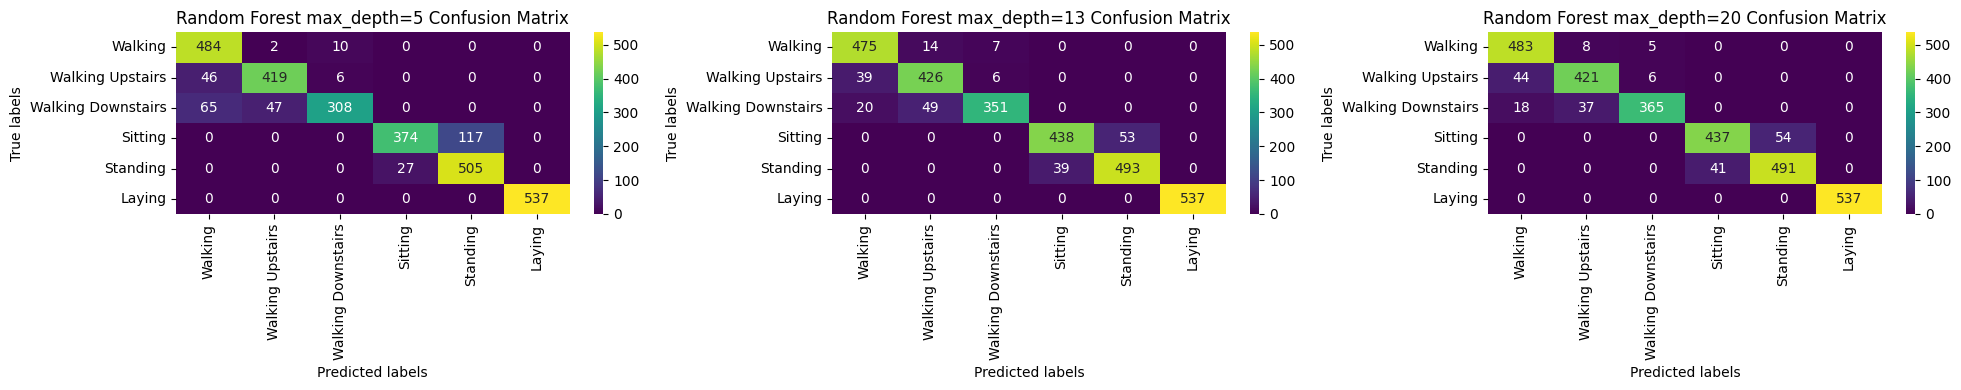

In [49]:
start_time = time.time()
new_yhat_1 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42).fit(train_X, train_y).predict(test_X)
time_1 = time.time() - start_time

start_time = time.time()
new_yhat_2 = RandomForestClassifier(n_estimators=100, max_depth=13, random_state=42).fit(train_X, train_y).predict(test_X)
time_2 = time.time() - start_time

start_time = time.time()
new_yhat_3 = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42).fit(train_X, train_y).predict(test_X)
time_3 = time.time() - start_time

new_conf_matrix_1 = confusion_matrix(test_y, new_yhat_1)
new_conf_matrix_2 = confusion_matrix(test_y, new_yhat_2)
new_conf_matrix_3 = confusion_matrix(test_y, new_yhat_3)

name_1, name_2, name_3 = "Random Forest max_depth=5", "Random Forest max_depth=13", "Random Forest max_depth=20"
print_acc3(test_y, new_yhat_1, new_yhat_2, new_yhat_3, name_1, name_2, name_3)
print_time3(time_1, time_2, time_3, name_1, name_2, name_3)
perform(new_conf_matrix_1, new_conf_matrix_2, new_conf_matrix_3,
        target_names, name_1, name_2, name_3)

Как видим, мы увеличили точность предсказаний, увеличив максимальную глубину дерева. Однако время выполнения значительно увеличилось. Оптимальные значения глубины деревьев для наших данных будут находится в промежутке от 5 до 13, дальше точность увеличивается незначительно.

Теперь исследуем параметр `min_samples_leaf`:

accuracy:
Random Forest min_samples_leaf=5: 0.89            
Random Forest min_samples_leaf=13: 0.89            
Random Forest min_samples_leaf=20: 0.89

time (sec):
Random Forest min_samples_leaf=5: 8.44            
Random Forest min_samples_leaf=13: 8.30            
Random Forest min_samples_leaf=20: 8.21



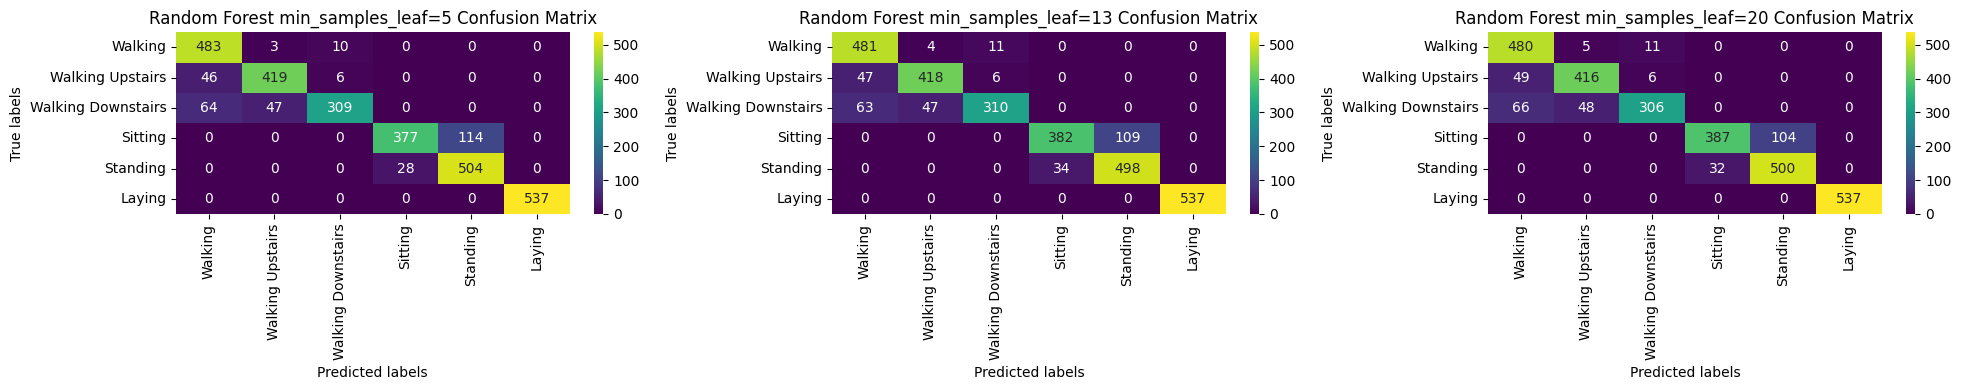

In [50]:
start_time = time.time()
new_yhat_1 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42, min_samples_leaf=5).fit(train_X, train_y).predict(test_X)
time_1 = time.time() - start_time

start_time = time.time()
new_yhat_2 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42, min_samples_leaf=13).fit(train_X, train_y).predict(test_X)
time_2 = time.time() - start_time

start_time = time.time()
new_yhat_3 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42, min_samples_leaf=20).fit(train_X, train_y).predict(test_X)
time_3 = time.time() - start_time

new_conf_matrix_1 = confusion_matrix(test_y, new_yhat_1)
new_conf_matrix_2 = confusion_matrix(test_y, new_yhat_2)
new_conf_matrix_3 = confusion_matrix(test_y, new_yhat_3)

name_1, name_2, name_3 = "Random Forest min_samples_leaf=5", "Random Forest min_samples_leaf=13", "Random Forest min_samples_leaf=20"
print_acc3(test_y, new_yhat_1, new_yhat_2, new_yhat_3, name_1, name_2, name_3)
print_time3(time_1, time_2, time_3, name_1, name_2, name_3)
perform(new_conf_matrix_1, new_conf_matrix_2, new_conf_matrix_3,
        target_names, name_1, name_2, name_3)

Как видим, при увеличении минимального количества листьев, время вычисления предсказаний уменьшается, точность при этом не меняется. Это можно объяснить тем, что при увеличении `min_samples_leaf` дерево становится менее глубоким, так как модель реже разделяет узлы, то есть структура дерева упрощается. Для каждого предсказания нужно пройти через меньшее кол-во разделений. Если деревья становятся менее сложными, это не означает, что предсказания гарантированно становятся менее точными.